In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import viz
import seaborn as sns
from sklearn import datasets
from sklearn import decomposition
from sklearn.datasets import load_diabetes
import pandas as pd
from os.path import join as oj
colors = ['#6E8E96', '#D3787D', '#AC3931']
out_dir = 'img'

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# generate some data

In [2]:
data_all = load_diabetes()
df = pd.DataFrame(data_all.data, columns=data_all.feature_names)
df.head()

d = df.copy() # d is same data, but with a categorical var
remap = {-0.044641636506989: 'male', 0.0506801187398187: 'female'}
d['sex'] = [remap[v] for v in df.sex]

**extended heatmap**

/Users/chandan/Desktop/data-viz-utils/viz.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(gs[topheight:, -rightwidth:])


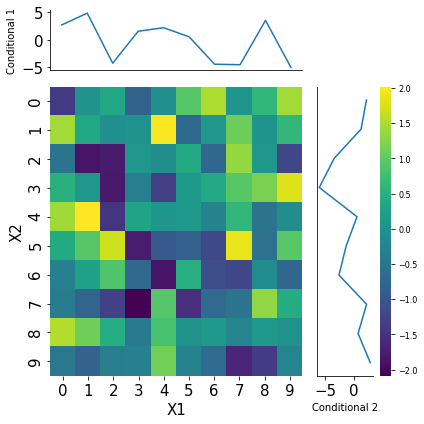

In [3]:
mat = np.random.randn(10, 10)
cond1 = mat.sum(axis=0)
cond2 = mat.sum(axis=1)
viz.heatmap_extended(mat, cond1, cond2, show_cbar=True, annot=False)
plt.savefig(oj(out_dir, 'plot_heatmap_extended.png'), dpi=300)

**pc plot**

/Users/chandan/Desktop/data-viz-utils/viz.py:159: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(feat_names))
/usr/local/Cellar/ipython/6.4.0_1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/usr/local/Cellar/ipython/6.4.0_1/libexec/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


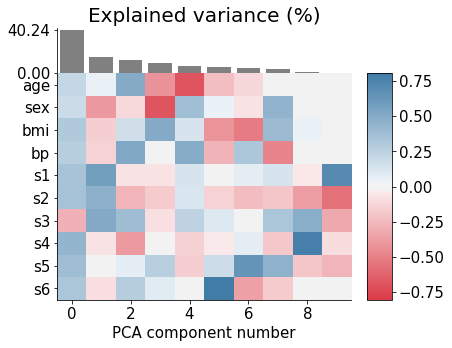

In [4]:
pca = decomposition.PCA()
pca.fit(df)
comps = pca.components_.transpose()
plt.figure(figsize=(6, 5))
viz.plot_pcs(pca, list(df.columns))
plt.savefig(oj(out_dir, 'plot_pcs.png'), dpi=300)
plt.show()

**grouped jointplot**

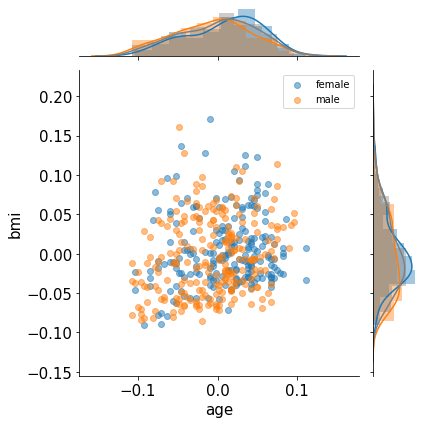

In [5]:
viz.jointplot_grouped('age', 'bmi', 'sex', d)
plt.savefig(oj(out_dir, 'plot_joint_grouped.png'), dpi=300)

**auto-label lines**

In [6]:
deaths = pd.read_csv('data/covid19_deaths_by_county_apr22.csv')
plt.figure(figsize=(15, 10))
for i in range(len(df_NE)):
    daily_cases = np.diff(df_NE['cases'].iloc[i])
    smooth_y = pd.Series(daily_cases).rolling(5).mean()
    if smooth_y.max() > 10:
        plt.plot(smooth_y[30:], linewidth=3., label=df_NE['CountyNamew/StateAbbrev'].iloc[i])
        plt.text(len(smooth_y)-1, smooth_y.values[-1], s=df_NE['CountyNamew/StateAbbrev'].iloc[i])
    elif smooth_y.max() > 5:
        plt.plot(smooth_y[30:], linewidth=1., alpha=.3, label=df_NE['CountyNamew/StateAbbrev'].iloc[i])
        plt.text(len(smooth_y)-1, smooth_y.values[-1], s=df_NE['CountyNamew/StateAbbrev'].iloc[i])
#plt.axvline(x=55, color='r', alpha=0.6, linestyle='--', linewidth=3.)
plt.xlim((30, len(smooth_y) + 6))
plt.xlabel("Days since first case in US")
plt.ylabel("Daily cases")
#plt.legend()

FileNotFoundError: [Errno 2] File data/covid19_deaths_by_county_apr22.csv does not exist: 'data/covid19_deaths_by_county_apr22.csv'

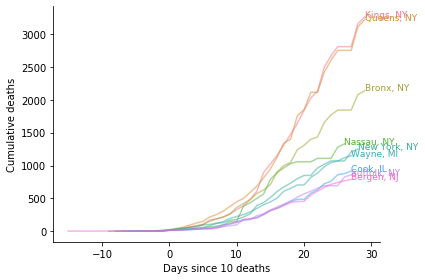

In [84]:
covid_county_data = pd.read_pickle('data/covid19_deaths_by_county_apr22.pkl')
R, C = 1, 2
NUM_COUNTIES = 9

plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# cs = sns.diverging_palette(20, 220, n=NUM_COUNTIES)
cs = sns.color_palette("husl", NUM_COUNTIES)
for i in range(NUM_COUNTIES):
    row = covid_county_data.iloc[i]
    deaths = np.array([x for x in row['deaths'] if x > 0])
    DEATHS_ALIGNMENT = 10
    idx_align_deaths = np.where(deaths > DEATHS_ALIGNMENT)[0][0]
    n2 = deaths.size
    x_aligned = np.arange(n2) - idx_align_deaths
    plt.plot(x_aligned, deaths, alpha=0.5, color=cs[i])
#     plt.yscale('log')
    plt.ylabel('Cumulative deaths')
    plt.xlabel(f'Days since {DEATHS_ALIGNMENT} deaths')
    plt.text(x_aligned.max(), deaths.max(),
             row['CountyName'] + ', ' + row['StateName'],
             color=cs[i], fontsize=9)

plt.tight_layout()
plt.savefig(oj(out_dir, 'plot_labeled_lines.png'), dpi=300)

**2-legend plot**

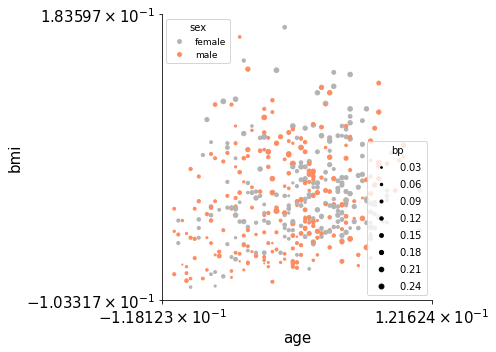

In [8]:
# cs_d = {'Male': 'red', 'Female': 'blue'}
# cs = ['#91bfdb','#dec34b','#fc8d59']
markersize_rescaling = 0.01
xlab = 'age'
ylab = 'bmi'
colorlab = 'sex'
sizelab = 'bp'
x = df[xlab]
y = d[ylab]
c = d[colorlab] #[cs_d[x] for x in d['sex']] # d['Severity 3-day'] #
s = (d[sizelab] - d[sizelab].min() + 0.01) / markersize_rescaling

viz.scatter_2_legends(x, y, c, s,
                      xlab, ylab, colorlab, sizelab,
                      markersize_rescaling, figsize=(7, 5))
plt.savefig(oj(out_dir, 'plot_scatter_2_legends.png'), dpi=300)